In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
df = pd.read_csv('data1.csv')

In [49]:
df.head()

,Type,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,1,6.6,35,1,0,1,0,254,0
1,1,6.6,36,0,1,0,1,253,0
2,1,8.5,70,1,1,1,1,246,2
3,1,9.5,34,1,1,0,1,255,2
4,1,6.6,37,0,0,0,0,255,1


In [50]:
df.isnull().sum()

Type          0
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.dropna(how='all', inplace=True)

In [53]:
df.describe()

,Type,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.503546,6.668085,44.014184,0.496454,0.390071,0.609929,0.432624,251.375887,1.085106
std,0.501770,1.055687,9.642900,0.501770,0.489505,0.489505,0.497206,4.517488,0.779096
min,0.000000,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,0.000000,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000,0.000000
50%,1.000000,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,1.000000,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,1.000000,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [54]:
df.Grade.value_counts()

1    55
2    49
0    37
Name: Grade, dtype: int64

<Axes: >

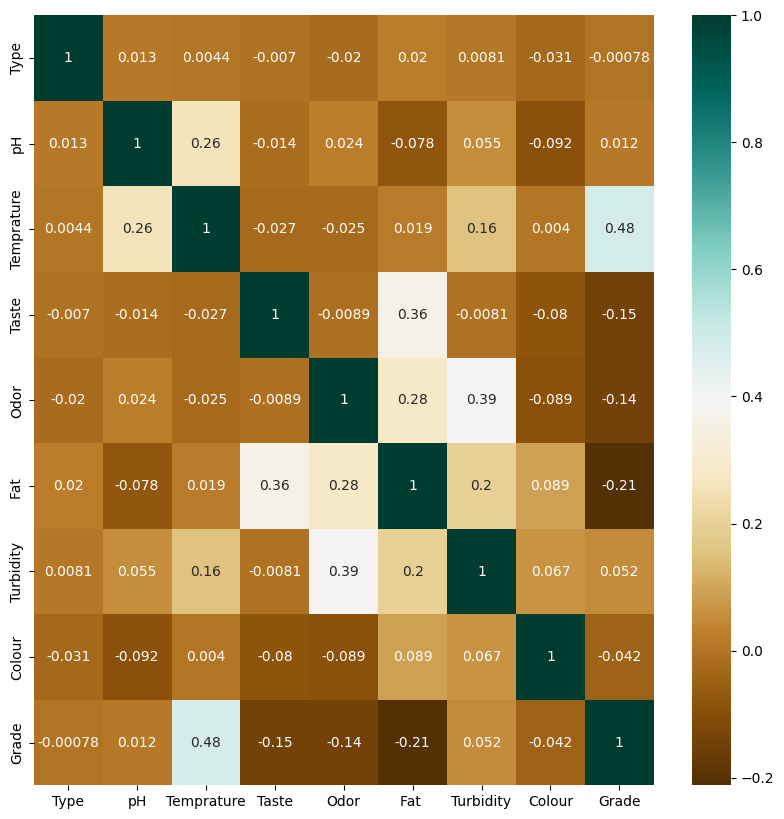

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='BrBG')

In [56]:
X = df.drop(['Grade'], axis = 1).values
y = df['Grade'].values

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [60]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [61]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 3}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 50}
Best parameters for XGBoost: {'n_estimators': 600, 'learning_rate': 0.2}


In [62]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=16)
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 50, learning_rate=0.8)
xgb = XGBClassifier(n_estimators= 50, learning_rate= 0.5)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, random_state=42),
                           n_estimators = 500, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=7,
                                                   min_samples_leaf=2,
                                                   random_state=42),
                  n_estimators=500, random_state=42)

In [63]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]

In [64]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.72
K Nearest Neighbours : 0.62
Decision Tree : 0.72
Random Forest : 0.90
AdaBoost : 0.90
Bagging Classifier : 0.86
XGBoost : 0.97


In [65]:
from sklearn.metrics import classification_report

y_pred_rf= xgb.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



In [77]:
#from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
#print(precision_score(y_test, y_pred_rf))
#print(recall_score(y_test, y_pred_rf))

In [67]:
print(confusion_matrix(y_test, y_pred_rf))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1 11]]


In [68]:
import pickle
filename = 'xgboost.sav'
pickle.dump(xgb, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('xgboost.sav', 'rb'))

In [69]:
filename = 'scaler.sav'
pickle.dump(sc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
scc = pickle.load(open('scaler.sav', 'rb'))

In [70]:
import pickle
loaded_model = pickle.load(open('xgboost.sav', 'rb'))
scc = pickle.load(open('scaler.sav', 'rb'))

In [71]:
data = df.iloc[3:4, :-1].values

In [72]:
data

array([[  1. ,   9.5,  34. ,   1. ,   1. ,   0. ,   1. , 255. ]])

In [73]:
sc_data = scc.transform(data)

In [74]:
sc_data

array([[ 0.99293277,  2.69209718, -1.04220579,  1.00711753,  1.25045446,
        -1.25045446,  1.14519667,  0.80510087]])

In [75]:
loaded_model.predict(sc_data)

array([2], dtype=int64)

In [76]:
df

,Type,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,1,6.6,35,1,0,1,0,254,0
1,1,6.6,36,0,1,0,1,253,0
2,1,8.5,70,1,1,1,1,246,2
3,1,9.5,34,1,1,0,1,255,2
4,1,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...,...
942,0,6.6,45,1,0,0,1,255,1
957,0,6.8,41,1,1,1,0,255,0
985,0,6.5,45,1,0,0,0,246,1
998,1,6.6,43,0,0,0,1,250,1
